In [1]:
import pandas
import matplotlib
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
import numpy
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.constraints import nonneg

Using TensorFlow backend.


In [2]:
names = ["Area","Date and Time","Day","Weather","Jam Factor"]
dataset = pandas.read_csv("trafficdata.csv",names=names,converters={"Area":int,"Date and Time":int,"Day":int,"Weather":int,"Jam Factor":float})
values = dataset.values

In [152]:
numpy.random.seed(7)

In [4]:
print(dataset.shape)

(774, 5)


In [5]:
print(dataset.head(20))

    Area  Date and Time  Day  Weather  Jam Factor
0      1     1521465608    1       34     3.36612
1      3     1521465608    1       34     7.51708
2      2     1521465608    1       34     6.87787
3      1     1521466237    1       34     3.36612
4      3     1521466238    1       34     6.61425
5      2     1521466238    1       34     8.09648
6      1     1521466837    1       31     3.36612
7      3     1521466838    1       31     6.58879
8      2     1521466838    1       31     8.06490
9      1     1521467437    1       31     3.12568
10     3     1521467438    1       31     6.58879
11     2     1521467438    1       31     8.10584
12     3     1521471815    1       31     7.72622
13     1     1521471815    1       31     2.88524
14     2     1521471815    1       31     2.43843
15     1     1521472415    1       31     1.78924
16     3     1521472415    1       31     6.32506
17     2     1521472415    1       31     2.43843
18     3     1521473015    1       31     6.01862


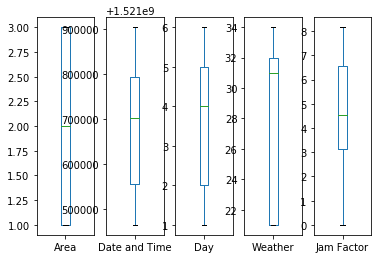

In [6]:
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

In [7]:
print(dataset.describe())

             Area  Date and Time         Day     Weather  Jam Factor
count  774.000000   7.740000e+02  774.000000  774.000000  774.000000
mean     2.000000   1.521685e+09    3.655039   28.391473    4.686097
std      0.817025   1.311251e+05    1.541532    5.194831    1.948761
min      1.000000   1.521466e+09    1.000000   21.000000    0.000000
25%      1.000000   1.521555e+09    2.000000   21.000000    3.125680
50%      2.000000   1.521703e+09    4.000000   31.000000    4.550120
75%      3.000000   1.521793e+09    5.000000   32.000000    6.572320
max      3.000000   1.521904e+09    6.000000   34.000000    8.160950


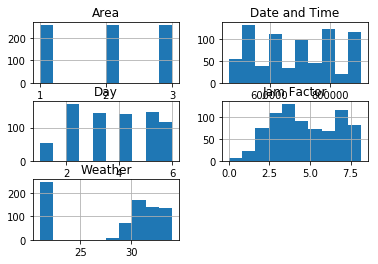

In [8]:
dataset.hist()
plt.show()

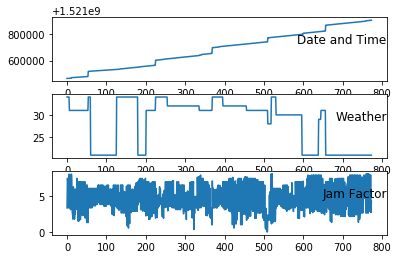

In [9]:
# specify columns to plot
groups = [1, 3, 4]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [10]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

In [153]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [154]:
#compile model
model.compile(loss='mse', optimizer='adam',metrics=['mae','mse'])

In [155]:
model.fit(X, Y, epochs=40, batch_size=10)

Epoch 1/40
774/774 [==============================] - 1s 1ms/step - loss: 2460315642.9311 - mean_absolute_error: 28903.2069 - mean_squared_error: 2460315642.9311
Epoch 2/40
774/774 [==============================] - 0s 600us/step - loss: 537747.2024 - mean_absolute_error: 472.3627 - mean_squared_error: 537747.2024
Epoch 3/40
774/774 [==============================] - 0s 590us/step - loss: 187.4991 - mean_absolute_error: 8.7917 - mean_squared_error: 187.4991
Epoch 4/40
774/774 [==============================] - 1s 943us/step - loss: 4.3721 - mean_absolute_error: 1.7803 - mean_squared_error: 4.3721
Epoch 5/40
774/774 [==============================] - 0s 448us/step - loss: 4.6151 - mean_absolute_error: 1.8085 - mean_squared_error: 4.6151
Epoch 6/40
774/774 [==============================] - 0s 523us/step - loss: 4.5495 - mean_absolute_error: 1.7915 - mean_squared_error: 4.5495
Epoch 7/40
774/774 [==============================] - 0s 521us/step - loss: 4.5695 - mean_absolute_error: 1.8233

In [156]:
scores = model.evaluate(X,Y)

774/774 [==============================] - 0s 551us/step


In [157]:
print("Mean Absolute Error: %.2f%%\nMean Squared Error: %.2f%%" % (scores[1],scores[2]))

Mean Absolute Error: 1.72%
Mean Squared Error: 4.25%


In [164]:
#Making predictions
my_input = numpy.array([[1,1521466838,1,31],[3,1521466844,4,31]])
predictions = model.predict(X)
for i in predictions:
    if(numpy.floor(i)<4):
        print("Light Traffic")
    elif(numpy.floor(i)>=4):
        print("Medium Traffic")

Light Traffic
Light Traffic
Light Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Light Traffic
Light Traffic
Light Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Light Traffic
Light Traffic
Light Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Light Traffic
Light Traffic
Light Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Light Traffic
Light Traffic
Light Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Light Traffic
Light Traffic
Light Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Light Traffic
Light Traffic
Light Traffic
Light Traffic
Light Traffic
Light Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Light Traffic
Light Traffic
Light Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium Traffic
Medium 